# Wave data analysis
From the raw data feed, get the following:
 - [f] get frequency data as collection (1/seconds) measure of cycles per second
 - [E] get wave energy data as E (meters squared per second)

Perform the following calculations:
  1. [df] Average of frequency pairs comparing each frequency with the one after it
  2. [Emid] calculate the Energy mid-point
  3. [fmid] calculate the frequency mid-point
  4. [SWF] Significant wave height integrating across the entire range of frequencies (as a function of wave periods)
  5. [p] define the arbitrary period second intervals (p = [0,5,7,9,11,13,15,17,19,21,35])
  6. [pmid] calculate the mid-point (between frequencies) Making plots nicer.
  7. [pf] shift the focus from frequencies to periods
  8. [SWHmid] # integrate the calculations: 4* sqrt(sum(df*Emid))

*PLOT the results*

In [1]:
%matplotlib inline

# the address to the buoy data (should pass in as argument)
# 46053 = E. Santa Barbara
# 46054 = W. Santa Barbara
# 46217 = Anacapa Passage
# 46086 = San Clemente Basin
# 46219 = San Nicolas Island
filename = '46219' # the buoy name
url = 'https://www.ndbc.noaa.gov/data/realtime2/{}.data_spec'.format(filename)
dest = './{}.data_spec'.format(filename)
from urllib.request import urlretrieve
urlretrieve(url, dest)


('./46219.data_spec', <http.client.HTTPMessage at 0x7fc2d054f438>)

### Read the file into 3 lists
Skipping the first 3 header lines

In [2]:
import matplotlib.pyplot as plt
import numpy as np
#filename = '46053' # the buoy name
dest = './{}.data_spec'.format(filename)

dates = []
energies = []
frequencies = []

with open(dest) as fp:
    for _ in range(3):
        next(fp)
    
    for l in fp:

        dates.append(l.split()[0:5])
        # separation_frequency = l.split()[5] # this value is ignored
        
        # [E] get wave energy data as E (meters squared per second)
        energies.append([float(e) for e in l.split()[6::2]])

        # [f] get frequency data as collection (1/seconds) measure of cycles per second
        freqs=l.split()[7::2]
        frequencies.append([float(i[1:-1]) for i in freqs])

    fp.close()
print("{}\t{}\t{}".format(len(dates), len(energies), len(frequencies)))

1074	1074	1074


### convert the lists to numpy arrays

In [3]:
E = np.array(energies)    # E for 'Energy'
f = np.array(frequencies) # f for 'frequency'

Take a look at the array:

E (Energy) is a numpy array (1074, 64)


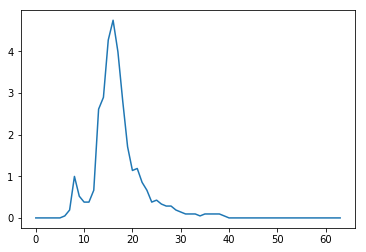

In [4]:
print("E (Energy) is a numpy array {}".format(E.shape))
sample_ndx = 722
E[sample_ndx,:]           # display the data
plt.plot(E[sample_ndx,:]) # view the data

In [5]:
f[sample_ndx,:]   # display the data

array([0.025, 0.03 , 0.035, 0.04 , 0.045, 0.05 , 0.055, 0.06 , 0.065,
       0.07 , 0.075, 0.08 , 0.085, 0.09 , 0.095, 0.101, 0.11 , 0.12 ,
       0.13 , 0.14 , 0.15 , 0.16 , 0.17 , 0.18 , 0.19 , 0.2  , 0.21 ,
       0.22 , 0.23 , 0.24 , 0.25 , 0.26 , 0.27 , 0.28 , 0.29 , 0.3  ,
       0.31 , 0.32 , 0.33 , 0.34 , 0.35 , 0.36 , 0.37 , 0.38 , 0.39 ,
       0.4  , 0.41 , 0.42 , 0.43 , 0.44 , 0.45 , 0.46 , 0.47 , 0.48 ,
       0.49 , 0.5  , 0.51 , 0.52 , 0.53 , 0.54 , 0.55 , 0.56 , 0.57 ,
       0.58 ])

### 1. [df] Average of frequency pairs comparing each frequency with the one after it

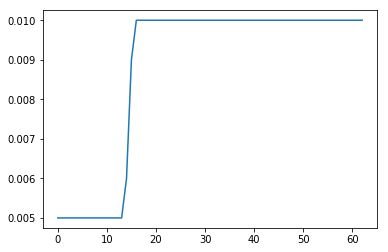

In [6]:
df = np.diff(f)
plt.plot(df[sample_ndx,:])# slice of one row

### 2. [Emid] calculate the Energy mid-point

In [7]:
notfirst = E[:,1:]       # every element in a row, except for the first
notlast  = E[:,:-1]      # every element in a row, except for the last
Emid = .5 * (notlast + notfirst) 
print(Emid.shape)
Emid[sample_ndx]

(1074, 63)


array([0.    , 0.    , 0.    , 0.    , 0.    , 0.024 , 0.119 , 0.5935,
       0.7595, 0.451 , 0.38  , 0.5225, 1.639 , 2.755 , 3.586 , 4.5125,
       4.37  , 3.396 , 2.256 , 1.425 , 1.164 , 1.0215, 0.76  , 0.5225,
       0.4035, 0.38  , 0.309 , 0.285 , 0.2375, 0.166 , 0.1185, 0.095 ,
       0.095 , 0.0715, 0.0715, 0.095 , 0.095 , 0.095 , 0.0715, 0.024 ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ])

### 3. [fmid] calculate the frequency mid-point

In [8]:
fmid = .5*(f[:,:-1] + f[:,1:]) 
print(fmid.shape)
fmid[sample_ndx]

(1074, 63)


array([0.0275, 0.0325, 0.0375, 0.0425, 0.0475, 0.0525, 0.0575, 0.0625,
       0.0675, 0.0725, 0.0775, 0.0825, 0.0875, 0.0925, 0.098 , 0.1055,
       0.115 , 0.125 , 0.135 , 0.145 , 0.155 , 0.165 , 0.175 , 0.185 ,
       0.195 , 0.205 , 0.215 , 0.225 , 0.235 , 0.245 , 0.255 , 0.265 ,
       0.275 , 0.285 , 0.295 , 0.305 , 0.315 , 0.325 , 0.335 , 0.345 ,
       0.355 , 0.365 , 0.375 , 0.385 , 0.395 , 0.405 , 0.415 , 0.425 ,
       0.435 , 0.445 , 0.455 , 0.465 , 0.475 , 0.485 , 0.495 , 0.505 ,
       0.515 , 0.525 , 0.535 , 0.545 , 0.555 , 0.565 , 0.575 ])

### 4. [SWH]  significant wave height (m -> multiply by 3.28 to get in feet)
integrating across the entire range of frequencies
(the integral)

SWH = 4\*sqrt(sum(df.*Emid,2)); 

.* takes two arrays and returns a 3rd array (of same size) The '2' restricts this to the 2nd dimension

Significant wave height: [1.75440702 1.96227011 2.10936957 ... 1.41846396 1.4435013  1.43517246]


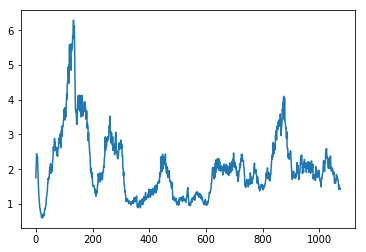

In [9]:
product = (df*Emid)
SWH = 4*np.sqrt(product.sum(axis=1)); 
print("Significant wave height:", SWH)
plt.plot(SWH)

### 5. [p] define period second intervals

In [10]:
p = np.array([0,5,7,9,11,13,15,17,19,21,35])
p

array([ 0,  5,  7,  9, 11, 13, 15, 17, 19, 21, 35])

### 6. [pmid] calculate the mid-point (between frequencies) 

In [11]:
notfirst = p[1:]       # every element in a row, except for the first
notlast  = p[:-1]      # every element in a row, except for the last
pmid = .5*(notfirst + notlast)
pmid

array([ 2.5,  6. ,  8. , 10. , 12. , 14. , 16. , 18. , 20. , 28. ])

---

### 7. [pf] shift the focus from frequencies to periods

In [15]:
pf = 1./fmid
print("pf:\n",pf)

pf:
 [[36.36363636 30.76923077 26.66666667 ...  1.8018018   1.7699115
   1.73913043]
 [36.36363636 30.76923077 26.66666667 ...  1.8018018   1.7699115
   1.73913043]
 [36.36363636 30.76923077 26.66666667 ...  1.8018018   1.7699115
   1.73913043]
 ...
 [36.36363636 30.76923077 26.66666667 ...  1.8018018   1.7699115
   1.73913043]
 [36.36363636 30.76923077 26.66666667 ...  1.8018018   1.7699115
   1.73913043]
 [36.36363636 30.76923077 26.66666667 ...  1.8018018   1.7699115
   1.73913043]]


### 8.[SWHmid] integrate the calculations: 4 sqrt(sum(dfEmid))